In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_files = pd.read_csv('/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/train/train.csv')
train_files.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
ship = { 1:'Cargo',
2 : 'Military',
 3 : 'Carrier',
 4 : 'Cruise',
5  : 'Tankers'}

In [7]:
train_files['ship'] = train_files['category'].map(ship).astype('category')

In [8]:
train_files.head()

,image,category,ship
0,2823080.jpg,1,Cargo
1,2870024.jpg,1,Cargo
2,2662125.jpg,2,Military
3,2900420.jpg,3,Carrier
4,2804883.jpg,2,Military


In [9]:
train_files['ship'].value_counts()

,count
ship,
Cargo,2120
Tankers,1217
Military,1167
Carrier,916
Cruise,832


In [10]:
train_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   image     6252 non-null   object  
 1   category  6252 non-null   int64   
 2   ship      6252 non-null   category
dtypes: category(1), int64(1), object(1)
memory usage: 104.1+ KB


In [11]:
labels = train_files.sort_values('ship')
class_names = list(labels.ship.unique())
# # for i in class_names:
#   os.makedirs(os.path.join('/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train',i))

In [12]:
test_files = pd.read_csv('/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/test_ApKoW4T.csv')
test_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2680 non-null   object
dtypes: object(1)
memory usage: 21.1+ KB


In [ ]:
import shutil
for c in class_names:
  for i in list(labels[labels['ship']==c]['image']):
    get_image = os.path.join('/content/drive/MyDrive/Smart Bridge project/train/images/',i)
    put_image = os.path.join('/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/',c)
    shutil.move(get_image,put_image)

In [ ]:
for img in test_files['image']:
  get_image = os.path.join('/content/drive/MyDrive/Smart Bridge project/train/images/',img)
  put_image = '/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/test/'
  shutil.move(get_image,put_image)

In [ ]:
import os

# Get all images from the 5 folders
cargo_images = os.listdir('/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Cargo')
tankers_images = os.listdir('/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Tankers')
military_images = os.listdir('/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Military')
carrier_images = os.listdir('/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Carrier')
cruise_images = os.listdir('/content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Cruise')

print(f"Cargo images: {len(cargo_images)}")
print(f"Tankers images: {len(tankers_images)}")
print(f"Military images: {len(military_images)}")
print(f"Carrier images: {len(carrier_images)}")
print(f"Cruise images: {len(cruise_images)}")

Cargo images: 2120
Tankers images: 1987
Military images: 2120
Carrier images: 2120
Cruise images: 2120


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
def image_augmentation(n_copys,folder_path):
  generated = 0

  datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )
  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path,filename)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Reshape for the generator

    # Generate up to n images
    aug_iter = datagen.flow(x, batch_size=1)
    for _ in range(10):  # Generate 10 augmentations per image (adjust as needed)
        aug_img = next(aug_iter)[0].astype('uint8')
        save_path = os.path.join(folder_path, f"aug_{generated}.jpg")
        array_to_img(aug_img).save(save_path)
        generated += 1
        if generated >= n_copys:
            break
    if generated >= n_copys:
        break

  print(f"{generated} augmented images saved to: {folder_path}")
  print(f"total no of images :{len(os.listdir(folder_path))}")


In [ ]:
tanker_copys = len(cargo_images) - len(tankers_images)
military_copys = len(cargo_images) - len(military_images)
carrier_copys = len(cargo_images) - len(carrier_images)
cruise_copys = len(cargo_images) - len(cruise_images)

trainer_folder_path = '/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/Ship Classfication/input/train'
image_augmentation(tanker_copys,os.path.join(trainer_folder_path,'Tankers'))
image_augmentation(military_copys,os.path.join(trainer_folder_path,'Military'))
image_augmentation(carrier_copys,os.path.join(trainer_folder_path,'Carrier'))
image_augmentation(cruise_copys,os.path.join(trainer_folder_path,'Cruise'))

770 augmented images saved to: /content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Tankers
total no of images :1987
953 augmented images saved to: /content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Military
total no of images :2120
1204 augmented images saved to: /content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Carrier
total no of images :2120
1288 augmented images saved to: /content/drive/MyDrive/Smart Bridge project/Ship Classfication/input/train/Cruise
total no of images :2120


In [13]:
print(len(os.listdir('/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/Ship Classfication/input/test')))

2680


In [14]:
import tensorflow as tf

# Paths & parameters

img_size = (224, 224)
batch_size = 16
seed = 123
trainer_folder_path = '/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/Ship Classfication/input/train'
# Train: 80%, Val+Test: 20%
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    trainer_folder_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True  # Shuffling is ON by default for training
)

val_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    trainer_folder_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True  # Also shuffle validation before splitting into val/test
)

# Split val_test into validation and test
val_batches = tf.data.experimental.cardinality(val_test_ds) // 2
val_ds = val_test_ds.take(val_batches)
test_ds = val_test_ds.skip(val_batches)

# Optional: Shuffle and prefetch for each dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.shuffle(500).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.shuffle(500).prefetch(buffer_size=AUTOTUNE)


Found 10467 files belonging to 5 classes.
Using 8374 files for training.
Found 10467 files belonging to 5 classes.
Using 2093 files for validation.


In [ ]:
def count_images(dataset):
    return sum(images.shape[0] for images, labels in dataset)

train_count = count_images(train_ds)
val_count = count_images(val_ds)
test_count = count_images(test_ds)

print(f"Exact number of images in training dataset: {train_count}")
print(f"Exact number of images in validation dataset: {val_count}")
print(f"Exact number of images in test dataset: {test_count}")


Exact number of images in training dataset: 8374
Exact number of images in validation dataset: 1040
Exact number of images in test dataset: 1053


In [ ]:
import numpy as np
from collections import Counter

class_counts = Counter()

for images, labels in train_ds:
    class_counts.update(labels.numpy())

print("Class-wise image counts in training set:")
for class_index, count in sorted(class_counts.items()):
    print(f"Class {class_index}: {count} images")


Class-wise image counts in training set:
Class 0: 1697 images
Class 1: 1683 images
Class 2: 1707 images
Class 3: 1693 images
Class 4: 1594 images


In [16]:
# Map categories to ship classes (if not already done)
ship = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tankers'}
train_files['ship'] = train_files['category'].map(ship).astype('category')

# Add path to each image
train_files['filename'] = train_files.apply(
    lambda row: f"/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/Ship Classfication/input/train/{row['ship']}/{row['image']}",
    axis=1
)

# # Downsample to the smallest class count (832)
# min_count = train_files['ship'].value_counts().min()
# balanced_df = train_files.groupby('ship').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


In [17]:
train_files.iloc[0,3]

'/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/Ship Classfication/input/train/Cargo/2823080.jpg'

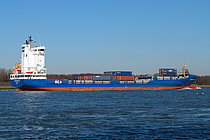

In [18]:
from PIL import Image

# Test if first image in train_df loads correctly
Image.open(train_files.iloc[0,3])


In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import DepthwiseConv2D, SeparableConv2D, AveragePooling2D, Flatten, Dense, Input, GlobalAveragePooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input
from sklearn.model_selection import train_test_split

In [ ]:
def create_model(input_shape, n_classes,optimizer):

    model2 = tf.keras.Sequential([
          tf.keras.layers.Rescaling(1./255, input_shape=input_shape),
          tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
          tf.keras.layers.MaxPooling2D((2, 2)),
          # tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
          tf.keras.layers.MaxPooling2D((2, 2)),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
          tf.keras.layers.MaxPooling2D((2, 2)),
          tf.keras.layers.Dropout(0.5),
          # tf.keras.layers.Conv2D(98, (3, 3), activation='relu'),
          # tf.keras.layers.MaxPooling2D((2, 2)),
          tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
          tf.keras.layers.MaxPooling2D((2, 2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])

    model2.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])
    return model2


In [43]:
strategy = tf.distribute.MirroredStrategy()
strategy.num_replicas_in_sync

1

In [44]:
from tensorflow.keras.optimizers import Adam

imput_shape = (224,224,3)
optim = Adam(learning_rate=0.0001)
model = create_model(imput_shape,5,optim)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,457,509 (9.37 MB)

 Trainable params: 2,457,509 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
import tensorflow as tf

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,457,509 (9.37 MB)

 Trainable params: 2,457,509 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.2294 - loss: 1.7237 - val_accuracy: 0.3981 - val_loss: 1.3637
Epoch 2/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.4374 - loss: 1.2666 - val_accuracy: 0.5288 - val_loss: 1.0973
Epoch 3/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.5774 - loss: 0.9985 - val_accuracy: 0.6231 - val_loss: 0.9196
Epoch 4/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.6594 - loss: 0.8372 - val_accuracy: 0.6462 - val_loss: 0.8443
Epoch 5/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.7208 - loss: 0.7025 - val_accuracy: 0.7231 - val_loss: 0.7160
Epoch 6/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.7867 - loss: 0.5560 - val_accuracy: 0.7067 - val_loss: 0.7190
Epoch 7/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.8332 - loss: 0.4481 - val_accuracy: 0.7702 - val_loss: 0.6295
Epoch 8/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8620 - loss: 0.3552 - 

In [48]:

model.save('/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/model3_training_plots/my_h5_model4.h5', save_format='h5')

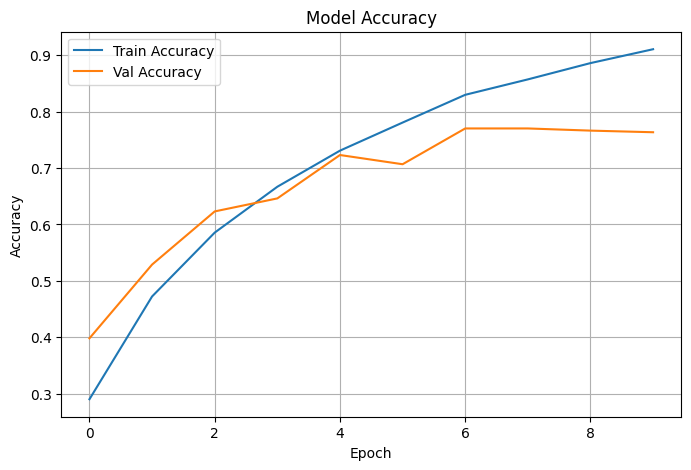

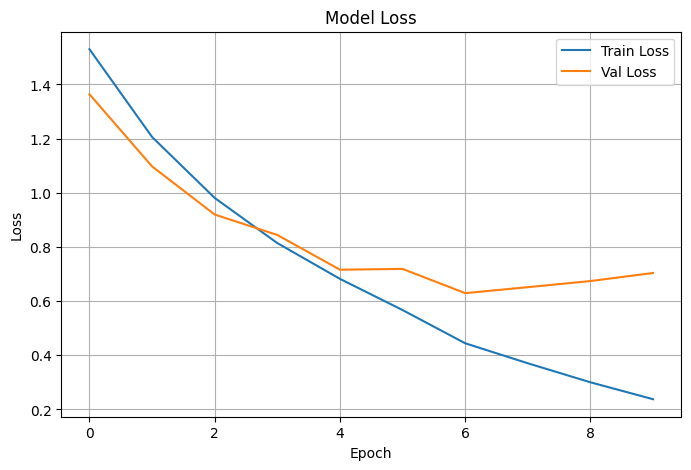

In [49]:
import matplotlib.pyplot as plt
import os

# Create a folder in your Google Drive
save_path = '/content/drive/MyDrive/Smart Bridge project/model4_training_plots'
os.makedirs(save_path, exist_ok=True)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_path, 'accuracy_plot.png'))  # Save to Drive
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_path, 'loss_plot.png'))  # Save to Drive
plt.show()


In [50]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/drive/MyDrive/Smart Bridge project Dataset/Smart Bridge project/Ship Classfication/input/train/Tankers/2778067.jpg',target_size=(224,224))
img = image.img_to_array(img)
img = img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))
# img = preprocess_input(img)

pred = model.predict(img)
pred = pred.flatten()
pred = list(pred)

m = max(pred)
val_dict = { 0:'Cargo',
            1 : 'Military',
            2 : 'Carrier',
            3 : 'Cruise',
            4  : 'Tankers'}
result = val_dict[pred.index(m)]
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Tankers


In [36]:
import numpy as np

# Extract true labels from the test dataset
true_val = []

for images, labels in test_ds:
    true_val.extend(labels.numpy())  # Add batch labels to the list

true_val = np.array(true_val)

print(f"Number of true labels: {len(true_val)}")
print("Sample labels:", true_val[:10])


Number of true labels: 1053
Sample labels: [0 2 1 0 3 3 2 3 0 3]


66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


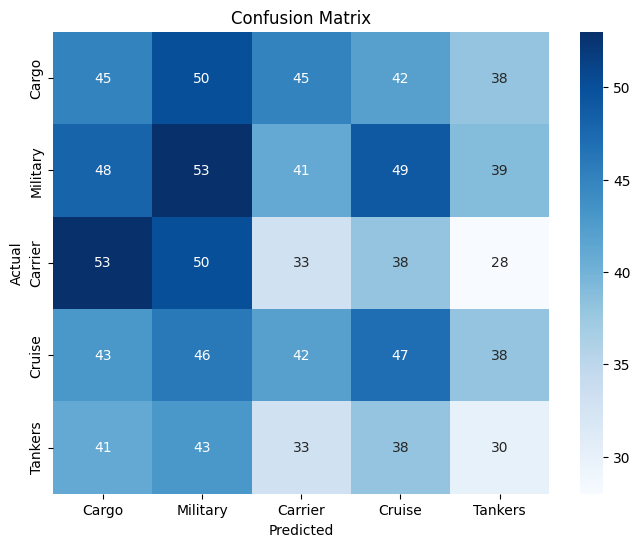

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# # Step 1: Get the true labels
# true_val = test_set.classes  # shape: (1249,)
# class_labels = list(test_set.class_indices.keys())  # For labels

# Step 2: Predict using the model
pred_probs = model.predict(test_ds, verbose=1)
pred = np.argmax(pred_probs, axis=1)  # Get class indices

# Step 3: Compute confusion matrix
cm = confusion_matrix(true_val, pred)

# Step 4: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=ship.values(), yticklabels=ship.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [52]:
model.evaluate(test_ds)

66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7955 - loss: 0.6391


[0.6556822657585144, 0.7815764546394348]

In [53]:
from sklearn.metrics import classification_report
print(classification_report(true_val,pred))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20       220
           1       0.22      0.23      0.22       230
           2       0.17      0.16      0.17       202
           3       0.22      0.22      0.22       216
           4       0.17      0.16      0.17       185

    accuracy                           0.20      1053
   macro avg       0.20      0.20      0.20      1053
weighted avg       0.20      0.20      0.20      1053

